In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/imdb_labelled.txt",sep="\t",header=None,index)
df

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [ ]:
df.shape

(748, 2)

In [ ]:
df.rename(columns={0:"Text",1:"Label"},inplace=True)

In [ ]:
df.head(5)

,Text,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
df["Label"].value_counts()

1    386
0    362
Name: Label, dtype: int64

In [ ]:
import spacy
!python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

In [ ]:
def preprocess_and_vectorize(text):
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)

  return " ".join(filtered_tokens)

In [ ]:
df["preprocessed_text"]=df['Text'].apply(lambda text: preprocess_and_vectorize(text))

In [ ]:
df.head()

,Text,Label,preprocessed_text
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movie distressed drift young...
1,Not sure who was more lost - the flat characte...,0,sure lose flat character audience nearly half ...
2,Attempting artiness with black & white and cle...,0,attempt artiness black white clever camera ang...
3,Very little music or anything to speak of.,0,little music speak
4,The best scene in the movie was when Gerardo i...,1,good scene movie Gerardo try find song keep ru...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_text,
    df.Label,
    test_size=0.2,
    random_state=2022,
    stratify=df.Label
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        73
           1       0.66      0.82      0.73        77

    accuracy                           0.69       150
   macro avg       0.70      0.69      0.69       150
weighted avg       0.70      0.69      0.69       150



In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf=Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multinomial', MultinomialNB())
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        73
           1       0.77      0.77      0.77        77

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



In [ ]:
review = [
    "The acting helps the writing along very well (maybe the idiot-savant sister could have been played better), and it is a real joy to watch",
    "The directing and the cinematography aren't quite as good.",
    "Then scene where they debated whether or not to sack the trumpeter (who falsely was accused for the murder) is pure horror, really stupid."
]
review_pred = [preprocess_and_vectorize(n) for n in review]
clf.predict(review_pred)


array([1, 1, 0])

Text(33.22222222222222, 0.5, 'Truth')

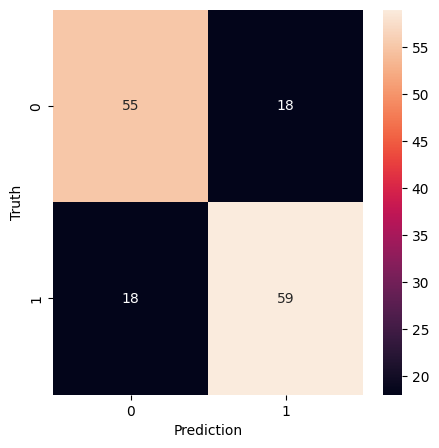

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
